##### [2022-DataMining]
# Lift Chart
#### 최민영

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 예측 결과 데이터 불러오기
* spotify hit predictor 예측 결과를 가져온다.

In [3]:
result = pd.read_csv('C:/Users/wl498/Documents/datamine/spotify_knn_15_rbst_seed1.csv')
result = result.sort_values('y_prob', ascending = False)
result

y_true  y_prob
1715       1     1.0
752        1     1.0
595        1     1.0
886        1     1.0
1333       1     1.0
...      ...     ...
712        0     0.0
1543       0     0.0
719        0     0.0
1538       0     0.0
590        0     0.0

[1920 rows x 2 columns]

In [4]:
R = 10
N = result.shape[0]
N1 = np.sum(result.y_true)
Nr = N // R
## Base Line
base_line_lift = N1/N
result['r'] = np.sort(np.tile(np.arange(R), Nr)[: N])
## Nr
lift_df = result.groupby('r').count().y_true.rename('Nr').to_frame()
## Nr(y=1)
lift_df['Nr1'] = result.groupby('r').apply(lambda x:x['y_true'].sum())
## response
lift_df['response'] = lift_df.Nr1/lift_df.Nr
lift_df['cum_response'] = lift_df.response.cumsum()
lift_df['cum_base'] = (N1)/N * np.arange(1, R+1)
## lift
lift_df['lift'] = (lift_df.response/ base_line_lift).round(2)
lift_df['cum_lift'] = (lift_df.cum_response/ lift_df.cum_base).round(2) ## 누적 lift

In [5]:
lift_df

Nr  Nr1  response  cum_response  cum_base  lift  cum_lift
r                                                            
0  192  162  0.843750      0.843750  0.492708  1.71      1.71
1  192  157  0.817708      1.661458  0.985417  1.66      1.69
2  192  149  0.776042      2.437500  1.478125  1.58      1.65
3  192  138  0.718750      3.156250  1.970833  1.46      1.60
4  192  127  0.661458      3.817708  2.463542  1.34      1.55
5  192  110  0.572917      4.390625  2.956250  1.16      1.49
6  192   79  0.411458      4.802083  3.448958  0.84      1.39
7  192   22  0.114583      4.916667  3.941667  0.23      1.25
8  192    2  0.010417      4.927083  4.434375  0.02      1.11
9  192    0  0.000000      4.927083  4.927083  0.00      1.00

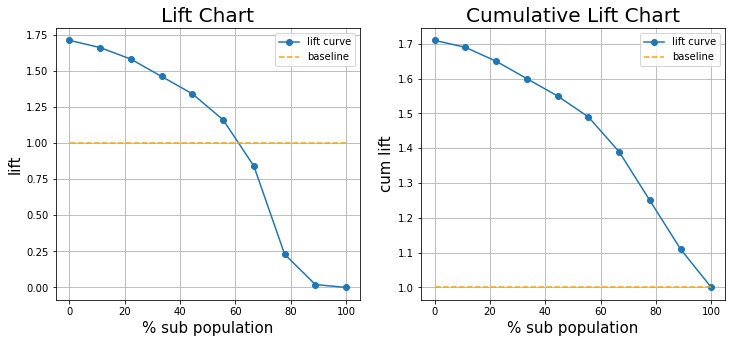

In [6]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot( np.linspace(0, 1, R) * 100, lift_df.lift, '-o')
plt.plot([100,0], [1,1], linestyle = '--', c = 'orange')
plt.grid()
plt.title('Lift Chart', size = 20)
plt.legend(['lift curve', 'baseline'])
plt.xlabel("% sub population", size = 15)
plt.ylabel("lift", size = 15)

plt.subplot(122)
plt.plot( np.linspace(0, 1, R) * 100, lift_df.cum_lift, '-o')
plt.plot([100,0], [1,1], linestyle = '--', c = 'orange')
plt.grid()
plt.title('Cumulative Lift Chart', size = 20)

plt.legend(['lift curve', 'baseline'])
plt.xlabel("% sub population", size = 15)
plt.ylabel("cum lift", size = 15)
plt.show()

### ```kds``` 패키지 이용

In [7]:
!pip install kds

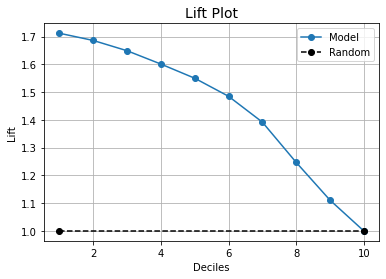

In [8]:
import kds
result = pd.read_csv('C:/Users/wl498/Documents/datamine/spotify_knn_15_rbst_seed1.csv')
kds.metrics.plot_lift(result.y_true, result.y_prob)

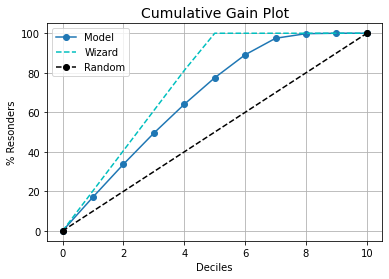

In [9]:
kds.metrics.plot_cumulative_gain(result.y_true,result.y_prob)

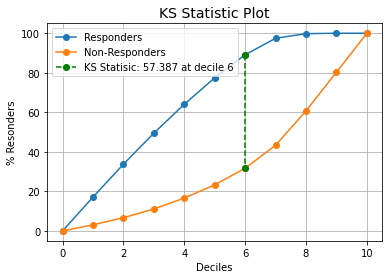

In [10]:
kds.metrics.plot_ks_statistic(result.y_true,result.y_prob)

In [11]:
kds.metrics.decile_table(result.y_true,result.y_prob, change_deciles = 10, round_decimal=3)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

decile  prob_min  prob_max  prob_avg  cnt_cust  cnt_resp  cnt_non_resp  \
0       1     0.933     1.000     0.960     192.0     162.0          30.0   
1       2     0.867     0.933     0.885     192.0     157.0          35.0   
2       3     0.800     0.867     0.829     192.0     149.0          43.0   
3       4     0.733     0.800     0.774     192.0     138.0          54.0   
4       5     0.667     0.733     0.710     192.0     127.0          65.0   
5       6     0.600     0.667     0.632     192.0     110.0          82.0   
6       7     0.400     0.600     0.491     192.0      79.0         113.0   
7       8     0.067     0.400     0.201     192.0      22.0         170.0   
8       9     0.000     0.067     0.010     192.0       2.0         190.0   
9      10     0.000     0.000     0.000     192.0       0.0         192.0   

   cnt_resp_rndm  cnt_resp_wiz  resp_rate  cum_cust  cum_resp  cum_resp_wiz  \
0           94.6           192     84.375     192.0     162.0           192   
1           94.6           192     81.771     384.0     319.0           384   
2           94.6           192     77.604     576.0     468.0           576   
3           94.6           192     71.875     768.0     606.0           768   
4           94.6           178     66.146     960.0     733.0           946   
5           94.6             0     57.292    1152.0     843.0           946   
6           94.6             0     41.146    1344.0     922.0           946   
7           94.6             0     11.458    1536.0     944.0           946   
8           94.6             0      1.042    1728.0     946.0           946   
9           94.6             0      0.000    1920.0     946.0           946   

   cum_non_resp  cum_cust_pct  cum_resp_pct  cum_resp_pct_wiz  \
0          30.0          10.0        17.125            20.296   
1          65.0          20.0        33.721            40.592   
2         108.0          30.0        49.471            60.888   
3         162.0          40.0        64.059            81.184   
4         227.0          50.0        77.484           100.000   
5         309.0          60.0        89.112           100.000   
6         422.0          70.0        97.463           100.000   
7         592.0          80.0        99.789           100.000   
8         782.0          90.0       100.000           100.000   
9         974.0         100.0       100.000           100.000   

   cum_non_resp_pct      KS   lift  
0             3.080  14.045  1.712  
1             6.674  27.047  1.686  
2            11.088  38.383  1.649  
3            16.632  47.427  1.601  
4            23.306  54.178  1.550  
5            31.725  57.387  1.485  
6            43.326  54.137  1.392  
7            60.780  39.009  1.247  
8            80.287  19.713  1.111  
9           100.000   0.000  1.000